In [1]:
import yaml
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline

import sys
sys.path.append("../")

from electronfactors.model.utilities import *
from electronfactors.model.threshold import *

In [2]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif',
             'size':'16'})
rc('text', usetex=True)

rc('legend', fontsize=16)

In [4]:
width, length, eqPonA, factor = pull_data(energy=12)
model = create_model(width, eqPonA, factor)

In [5]:
x = np.arange(np.floor(np.min(width)) - 1, np.ceil(np.max(width)), 0.01)
y = np.arange(np.floor(np.min(eqPonA)*10)/10 - 0.2, np.ceil(np.max(eqPonA)*10)/10 + 0.1, 0.002)

xx, yy = np.meshgrid(x, y)

zz = model(xx, yy)
give_contour = fit_give(xx, yy, width, eqPonA, factor, kx=2, ky=1)

maximum_eqPonA = to_eqPonA(xx, xx)

mesh_max_area = ((10 * np.sqrt(2) - xx) * xx + (xx/np.sqrt(2))**2)
mesh_max_length = 4 * mesh_max_area / (np.pi * xx)

minimum_rqPonA = to_eqPonA(xx, mesh_max_length)

outOfTolerance = (give_contour > 0.5) | (yy > maximum_eqPonA) | (yy < minimum_rqPonA)

zz[outOfTolerance] = np.nan
    
# zz = np.floor(zz*1e4)/1e4

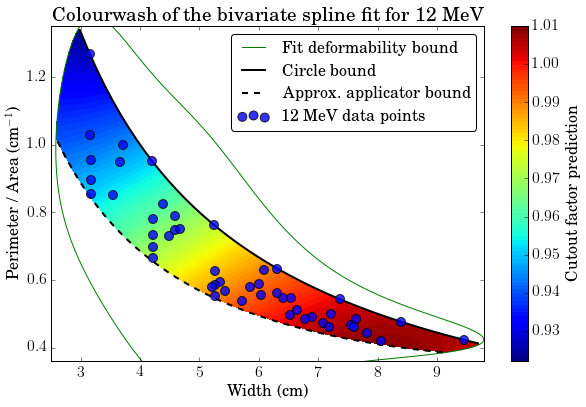

In [6]:
circle_bound_width = np.linspace(np.min(width) - 0.16, np.max(width) + 0.24)
circle_bound_eqPonA = to_eqPonA(circle_bound_width, circle_bound_width)

max_eqPonA_width = np.linspace(2.61, 9.1)
max_area = ((10 * np.sqrt(2) - max_eqPonA_width) * max_eqPonA_width + (max_eqPonA_width/np.sqrt(2))**2)
max_length = 4 * max_area / (np.pi * max_eqPonA_width)
max_eqPonA = to_eqPonA(max_eqPonA_width, max_length)



plt.figure(figsize=(6 * 1.618, 6))
c = plt.contourf(xx, yy ,zz, 100, alpha=1)
colourbar = plt.colorbar(c, ticks=np.arange(0.90, 1.1, 0.01), label=r'Cutout factor prediction')

plt.scatter(width, eqPonA, s=80, alpha=0.8, zorder=3, label=r'12 MeV data points')

plt.contour(xx, yy, give_contour, levels=[0.5], colors='g')
plt.plot(3, 0.4, 'g-', label=r'Fit deformability bound')

plt.plot(circle_bound_width, circle_bound_eqPonA, 'k', lw=2, label=r'Circle bound')
plt.plot(max_eqPonA_width, max_eqPonA, 'k--', lw=2, label=r'Approx. applicator bound')

plt.xlabel(r'Width (cm)')
plt.ylabel(r'Perimeter / Area (cm$^{-1}$)')
plt.title(r'Colourwash of the bivariate spline fit for 12 MeV')
plt.xlim([2.5, 9.8])
plt.ylim([0.36,1.35])

plt.legend(fancybox=True)

In [7]:
x = np.arange(2.5, 10, 0.01)
y = np.arange(2.5, 18, 0.02)

mesh_width, mesh_length = np.meshgrid(x, y)

mesh_eqPonA = to_eqPonA(mesh_width, mesh_length)

width_length_zz = model(mesh_width, mesh_eqPonA)
give = fit_give(mesh_width, mesh_eqPonA, width, eqPonA, factor, kx=2, ky=1)


mesh_max_area = ((10 * np.sqrt(2) - mesh_width) * mesh_width + (mesh_width/np.sqrt(2))**2)
mesh_max_length = 4 * mesh_max_area / (np.pi * mesh_width)


outOfTolerance = (give > 0.5) | (mesh_width > mesh_length) | (mesh_length > mesh_max_length)

width_length_zz[outOfTolerance] = np.nan

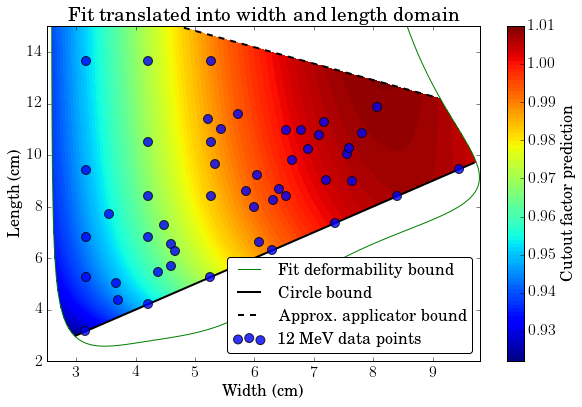

In [8]:
circle_bound_width = np.linspace(np.min(width) - 0.16, np.max(width) + 0.24)

max_length_width = np.linspace(2, 9.1)
max_area = ((10 * np.sqrt(2) - max_length_width) * max_length_width + (max_length_width/np.sqrt(2))**2)
max_length = 4 * max_area / (np.pi * max_length_width)


plt.figure(figsize=(6 * 1.618, 6))
c = plt.contourf(mesh_width, mesh_length ,width_length_zz, 100, alpha=1)
colourbar = plt.colorbar(c, ticks=np.arange(0.90, 1.1, 0.01), label=r'Cutout factor prediction')

plt.scatter(width, length, s=80, alpha=0.8, zorder=3, label=r'12 MeV data points')

plt.contour(mesh_width, mesh_length, give, levels=[0.5], colors='g')
plt.plot(3, 0.4, 'g-', label=r'Fit deformability bound')

plt.plot(circle_bound_width, circle_bound_width, 'k', lw=2, label=r'Circle bound')
plt.plot(max_length_width, max_length, 'k--', lw=2, label=r'Approx. applicator bound')

plt.xlabel(r'Width (cm)')
plt.ylabel(r'Length (cm)')
plt.title(r'Fit translated into width and length domain')
plt.xlim([2.5, 9.8])
plt.ylim([2,15])

# plt.axis("Equal")
legend = plt.legend(fancybox=True, loc='lower right')
legend.get_frame().set_facecolor('white')

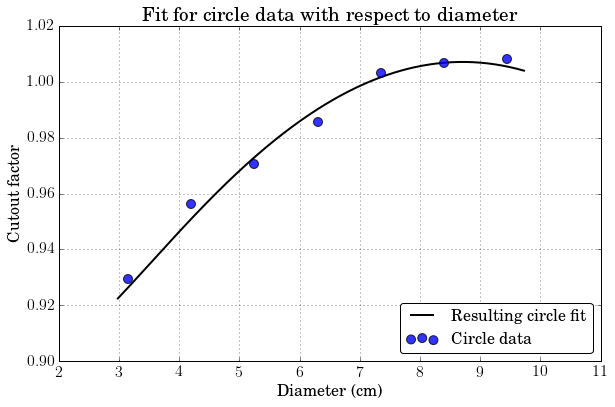

In [9]:
plt.figure(figsize=(6 * 1.618, 6))

circle_width = np.linspace(2,12, 1000)
circle_eqPonA = to_eqPonA(circle_width, circle_width)

give_circle = fit_give(circle_width, circle_eqPonA, width, eqPonA, factor, kx=2, ky=1)
circle_width = circle_width[give_circle < 0.5]
circle_eqPonA = circle_eqPonA[give_circle < 0.5]

circle_prediction = model(circle_width, circle_eqPonA)
plt.plot(circle_width, circle_prediction, 'k', lw=2, label=r'Resulting circle fit')
circle_ref = np.abs(width - length) < 0.1
plt.scatter(
    width[circle_ref], factor[circle_ref], 
    s=80, alpha=0.8, zorder=3, label=r'Circle data')

plt.xlabel('Diameter (cm)')
plt.ylabel('Cutout factor')
plt.title('Fit for circle data with respect to diameter')
legend = plt.legend(fancybox=True, loc='lower right')
legend.get_frame().set_facecolor('white')

plt.grid(True)

In [10]:
# plt.figure(figsize=(6 * 1.618, 6))

# circle_width = np.linspace(2,12, 1000)
# circle_eqPonA = to_eqPonA(circle_width, circle_width)

# give_circle = fit_give(circle_width, circle_eqPonA, width, eqPonA, factor, kx=2, ky=1)
# circle_width = circle_width[give_circle < 0.5]
# circle_eqPonA = circle_eqPonA[give_circle < 0.5]

# circle_prediction = model(circle_width, circle_eqPonA)
# plt.plot(circle_width, circle_prediction, 'k', lw=2, label=r'Fit bounded by malleability')
# circle_ref = np.abs(width - length) < 0.1
# plt.scatter(width[circle_ref], factor[circle_ref], s=80, alpha=0.8, zorder=3, label=r'Data points')

# plt.xlabel('Width (cm)')
# plt.ylabel('Cutout factor')
# plt.title('12 MeV bivariate spline fit for circles')
# plt.legend(loc='center right')

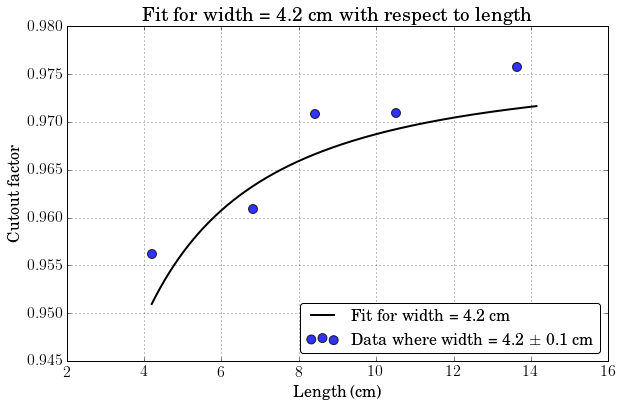

In [11]:
plt.figure(figsize=(6 * 1.618, 6))

specific_width = 4.2
specific_width = np.array([specific_width]*1000)

specific_width_length = np.linspace(specific_width, 10 * np.sqrt(2), 1000)
specific_width_eqPonA = to_eqPonA(specific_width, specific_width_length)

give_specific_width = fit_give(specific_width, specific_width_eqPonA, width, eqPonA, factor, kx=2, ky=1)
specific_width = specific_width[give_specific_width < 0.5]
specific_width_eqPonA = specific_width_eqPonA[give_specific_width < 0.5]
specific_width_length = specific_width_length[give_specific_width < 0.5]

specific_width_prediction = model(specific_width, specific_width_eqPonA)
plt.plot(specific_width_length, specific_width_prediction, 'k', lw=2, label=r'Fit for width = 4.2 cm')

specific_width_ref = np.abs(width - specific_width[0]) < 0.1
plt.scatter(
    length[specific_width_ref], factor[specific_width_ref], 
    s=80, alpha=0.8, zorder=3, label=r'Data where width = 4.2 $\pm$ 0.1 cm')

plt.xlabel('Length (cm)')
plt.ylabel('Cutout factor')
plt.title('Fit for width = 4.2 cm with respect to length')
legend = plt.legend(fancybox=True, loc='lower right')
legend.get_frame().set_facecolor('white')

plt.grid(True)

In [12]:
# plt.figure(figsize=(6 * 1.618, 6))

# specific_width = 5.3
# specific_width = np.array([specific_width]*1000)

# specific_width_length = np.linspace(specific_width, 10 * np.sqrt(2), 1000)
# specific_width_eqPonA = to_eqPonA(specific_width, specific_width_length)

# give_specific_width = fit_give(specific_width, specific_width_eqPonA, width, eqPonA, factor, kx=2, ky=1)
# specific_width = specific_width[give_specific_width < 0.5]
# specific_width_eqPonA = specific_width_eqPonA[give_specific_width < 0.5]
# specific_width_length = specific_width_length[give_specific_width < 0.5]

# specific_width_prediction = model(specific_width, specific_width_eqPonA)
# plt.plot(specific_width_length, specific_width_prediction, 'k', lw=2, label=r'Fit for equivalent width = 5.3 cm')

# specific_width_ref = np.abs(width - specific_width[0]) < 0.1
# plt.scatter(
#     length[specific_width_ref], factor[specific_width_ref], 
#     s=80, alpha=0.8, zorder=3, label=r'Data when equivalent width = 5.3 $\pm$ 0.1 cm')

# plt.xlabel('Equivalent length (cm)')
# plt.ylabel('Cutout factor')
# plt.title('Fit for equivalent width = 5.3 cm')
# legend = plt.legend(fancybox=True, loc='lower right')
# legend.get_frame().set_facecolor('white')

# plt.grid(True)

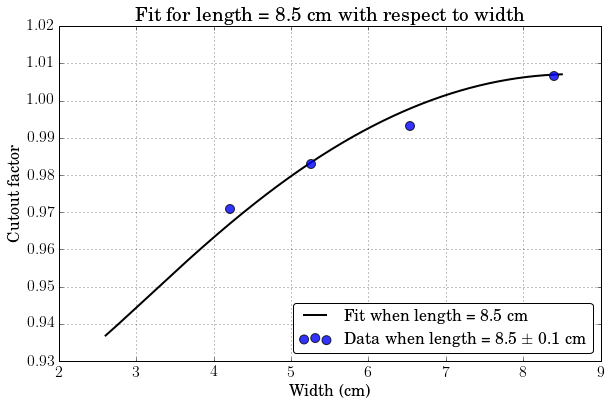

In [13]:
plt.figure(figsize=(6 * 1.618, 6))

specific_length = 8.5
specific_length = np.array([specific_length]*1000)

specific_length_width = np.linspace(2, specific_length[0], 1000)
specific_length_eqPonA = to_eqPonA(specific_length_width, specific_length)

give_specific_length = fit_give(specific_length_width, specific_length_eqPonA, width, eqPonA, factor, kx=2, ky=1)
specific_length_width = specific_length_width[give_specific_length < 0.5]
specific_length_eqPonA = specific_length_eqPonA[give_specific_length < 0.5]
specific_length = specific_length[give_specific_length < 0.5]

specific_length_prediction = model(specific_length_width, specific_length_eqPonA)
plt.plot(specific_length_width, specific_length_prediction, 'k', lw=2, label=r'Fit when length = 8.5 cm')

specific_length_ref = np.abs(length - specific_length[0]) < 0.1
plt.scatter(
    width[specific_length_ref], factor[specific_length_ref], 
    s=80, alpha=0.8, zorder=3, label=r'Data when length = 8.5 $\pm$ 0.1 cm')

plt.xlabel('Width (cm)')
plt.ylabel('Cutout factor')
plt.title('Fit for length = 8.5 cm with respect to width')
legend = plt.legend(fancybox=True, loc='lower right')
legend.get_frame().set_facecolor('white')

plt.grid(True)

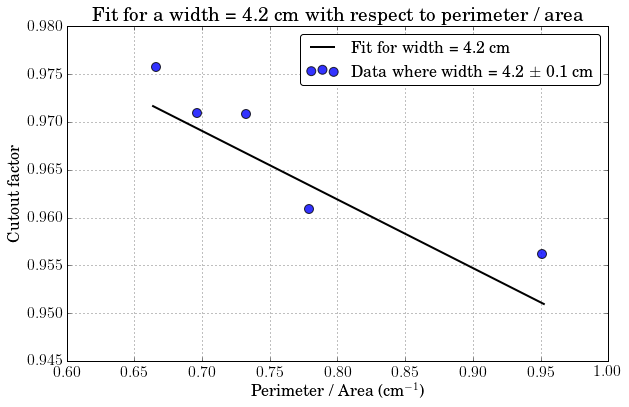

In [14]:
plt.figure(figsize=(6 * 1.618, 6))

specific_width = 4.2
specific_width = np.array([specific_width]*1000)

# specific_width_length = np.linspace(specific_width, 10 * np.sqrt(2), 1000)

eqPonA_min = to_eqPonA(specific_width[0], 10 * np.sqrt(2))
eqPonA_max = to_eqPonA(specific_width[0], specific_width[0])
specific_width_eqPonA = np.linspace(eqPonA_min, eqPonA_max, 1000)

give_specific_width = fit_give(specific_width, specific_width_eqPonA, width, eqPonA, factor, kx=2, ky=1)
specific_width = specific_width[give_specific_width < 0.5]
specific_width_eqPonA = specific_width_eqPonA[give_specific_width < 0.5]
# specific_width_length = specific_width_length[give_specific_width < 0.5]

specific_width_prediction = model(specific_width, specific_width_eqPonA)
plt.plot(specific_width_eqPonA, specific_width_prediction, 'k', lw=2, label=r'Fit for width = 4.2 cm')

specific_width_ref = np.abs(width - specific_width[0]) < 0.1
plt.scatter(
    eqPonA[specific_width_ref], factor[specific_width_ref], 
    s=80, alpha=0.8, zorder=3, label=r'Data where width = 4.2 $\pm$ 0.1 cm')

plt.xlabel('Perimeter / Area (cm$^{-1}$)')
plt.ylabel('Cutout factor')
plt.title('Fit for a width = 4.2 cm with respect to perimeter / area')
legend = plt.legend(fancybox=True, loc='upper right')
legend.get_frame().set_facecolor('white')

plt.grid(True)